<a href="https://colab.research.google.com/github/abdullahzahid10/EEEM066/blob/main/Week_4_Linear_Regression_and_Classification_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sources:
* This notebook used (and modified) code from the following repos and sources:
    * https://github.com/jonkrohn/ML-foundations
    * https://github.com/mrdbourke/pytorch-deep-learning
    * https://github.com/valerija-h/CS551G-Assignment-1.git
    * [CNN Explainer](https://poloclub.github.io/cnn-explainer/) - Detailed visualisation of what happens inside a CNN
    * [CNN Explainer paper](https://arxiv.org/abs/2004.15004)
    * [What is a convolution?](https://www.youtube.com/watch?v=KuXjwB4LzSA) from the 3Blue1Brown youtube channel
    * [Convolution arithmetic](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md) - An excellent visual illustration of convolutional operations (stride, padding,..etc)
    * https://lilianweng.github.io/
    
For any questions please contact the demonstrators:
* [Kam Woh Ng](kamwoh.ng@surrey.ac.uk)
* [Swapnil Bhosale](s.bhosale@surrey.ac.uk)
* [Haosen "Happy" Yang](h.yang@surrey.ac.uk)
* [Al-Hussein Abutaleb](a.abutaleb@surrey.ac.uk)

In this notebook, you will be introduced to solving linear [classification](https://en.wikipedia.org/wiki/Statistical_classification) problems using synthetic data in PyTorch.

Broadly, there are three types of classification problems:

| Problem type | What is it? | Example |
| ----- | ----- | ----- |
| **Binary classification** | Target can be one of two options, e.g. yes or no | Predict whether or not someone has heart disease based on their health parameters. |
| **Multi-class classification** | Target can be one of more than two options | Decide whether a photo of is of food, a person or a dog. |
| **Multi-label classification** | Target can be assigned more than one option | Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosohpy). |


We will first present a [linear regression](https://www.youtube.com/watch?v=YAJ5XBwlN4o) model in PyTorch and solve it. Then we will introduce several classification problems where we will be using synthetic data from the Scikit-learn library.

In [7]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu118'

## 1. Data (preparing and loading)

Let's create synthetic data

In [8]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
# this is just the equation of the line. the weight and bias are the 'trainable' parameters in it. So, we will try to find parameter values that when the data X is plugged into the equation we get y's (predictions) that are as close as possilble to the real (ground truth/targets) y's
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [9]:
len(X), len(y)

(50, 50)

#### Note here that X is a vector representign the features of the data, and y is the vector representing the labels (targets)

### Split data into training and test sets

But before we build a model we need to split the data up into a training and test sets. We can create them by splitting our `X` and `y` tensors.

> **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples. Contamination of the test set with examples from the training set is a red flag and will hugely drop the confidence of your model's performance.


In [10]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Let's visualise the data we created!

In [13]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

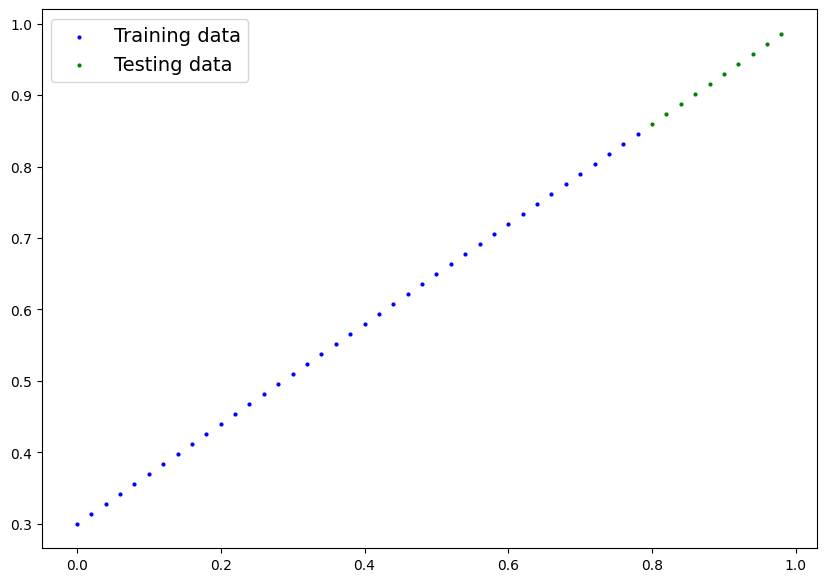

In [12]:
plot_predictions();

This is a straight line! Indeed, if you refer back to the cell above in which

---

we created the data you will see that we created the vectors using `X = torch.arange(start, end, step).unsqueeze(dim=1)` which is a list of numbers equally spaced by step. The training data X is plotted in blue and testing data is plotted in green as a continuation of the same line! Remember that we initially created one tensor and then split it into two parts....

## 2. Let's build a linear regression model!

* Use [`nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html) to create the model.
* Do you know why we set [`requires_grad`](https://pytorch.org/docs/stable/generated/torch.Tensor.requires_grad.html) to `True`?
* Read the section [`PyTorch: Defining new autograd functions`](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#:~:text=PyTorch%3A%20Defining%20new%20autograd%20functions,-Under%20the%20hood&text=The%20forward%20function%20computes%20output,to%20that%20same%20scalar%20value.) - Are you able to tell what role of the `forward` method is?
* For the interested reader, this is a brief review of Object Oriented Programming (OOD) in Python - https://realpython.com/python3-object-oriented-programming/



In [14]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- nearly everything in PyTorch is a nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch datatype is float32 by default, we explicitly write it here for clarity
                                   requires_grad=True) # <- can we update this value with gradient descent?

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default, we explicitly write it here for clarity
                                requires_grad=True) # <- can we update this value with gradient descent?

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

### Broadly, there are four essential modules in PyTorch that can be used to create nearly any neural network. There are:
* [`torch.nn`](https://pytorch.org/docs/stable/nn.html)
* [`torch.optim`](https://pytorch.org/docs/stable/optim.html)
* [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)
* [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html).

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, this is often referred to as "autograd".  |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |

If the above sounds complex, think of it like this, almost everything in a PyTorch neural network comes from `torch.nn`,
* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within  `nn.Module`(s)
* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

![a pytorch linear model with annotations](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png)
*Basic building blocks of creating a PyTorch model by subclassing `nn.Module`. For objects that subclass `nn.Module`, the `forward()` method must be defined.*

> **Resource:** See more of these essential modules and their uses cases in the [official PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html).





In [15]:
# Set manual seed since nn.Parameter are randomly initialzied
# Briefly, manual_seed is a way to guarantee that the randomness in initialising the model can be reproduced when using the correct seed - ask the demonstrator if this part is not clear
# 42 is because....well, Douglas Adams!
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

We can also get the state (what the model contains) of the model using [`.state_dict()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.state_dict).

In [16]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

`state_dict()` will be crucial later on when it comes to saving and loading PyTorch models.

Notice how the values for `weights` and `bias` from `model_0.state_dict()` come out as random float tensors? This is becuase we initialized them above using `torch.randn()`. Essentially we want to start from random parameters and get the model to update them towards parameters that fit our data best (the super secret hardcoded `weight` and `bias` values we set when creating our straight line data). Remember, that the purpose of this entire exercise is to use ML to find out 'ostensibly' unknown parameter values (weight + bias) using only the training observations (data) and thier corresponding predictions.




### Making predictions using [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.inference_mode.html)
We here attempting the guage the predictive power of the model we built **before** training it. To check this we can pass it the test data `X_test` to see how closely it predicts `y_test`.

>**What do you expect the error rate to be?** How do you expect the model that you built above to perform? Remember, we have not yet conducted any 'training'.

When we pass data to our model, it'll go through the model's `forward()` method and produce a result using the computation we've defined. However, it'll use parameter values (weights and biases) that are completely random and are of no significance whatsoever to the desired output of the model.

`torch.inference_mode()` is a [context manager](https://realpython.com/python-with-statement/) that facilitates the process of generating predictions from a model without altering the model's parameters. In other words, we just want to test the model, no learning is expected to take place. You can also use `torch.no_grad()` which does exactly the same thing but is a little bit slower.

In [17]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# https://twitter.com/PyTorch/status/1437838231505096708?s=20
# with torch.no_grad():
#   y_preds = model_0(X_test)


What do you expect the length of `y_preds` to be?

In [18]:
len(y_preds)

10

In [19]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


This is because of the kind of data we're using. For our straight line, one `X` value maps to one `y` value.

However, machine learning models are very flexible. You could have 100 `X` values mapping to one, two, three or 10 `y` values. It all depends on what you're working on.

Our predictions are still numbers on a page, let's visualize them with our `plot_predictions()` function we created above.

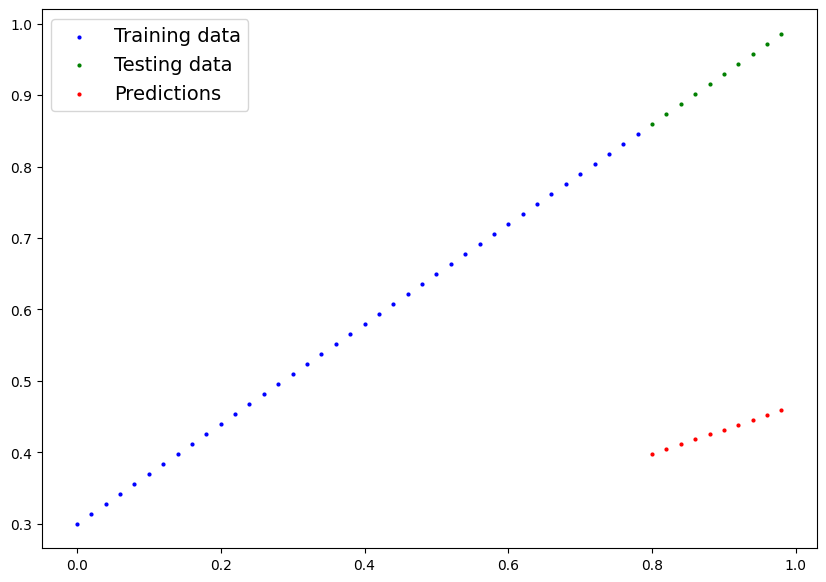

In [20]:
plot_predictions(predictions=y_preds)

On average, what do you expect the error in each prediction to be?



In [21]:
#difference between the real values of the targets (labels of the test set) and the predicted labels by the model before any training is performed....obviously, performance is not optimal.
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

## 3. Training `LinearRegressionModel()`

Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly). You can see this from the errors, they're essentially hovering around 'chance', 50/50!

To fix that, we can update the model's parameters, the `weights` and `bias` values we set randomly using `nn.Parameter()` and `torch.randn()` to be something that better represents the data.

We could hard code this (since we know the default values `weight=0.7` and `bias=0.3`), after all, these are the ground truth values and they would work! But that defeats the whole purpose of building the model!
So, we need to train the model, shift its parameters gradually until the output of the model during the training process (y_train) gets closer to y (ground truth). At which point, we expect that the estimated `weight` and `bias` to be close to the ground truth values of `weight=0.7` and `bias=0.3`.

### Creating a loss function and optimizer in PyTorch

For the model we built to update its parameters (that is the weights and bias in this case) on its own, we'll need to add a few more things: And that's a [**loss function**](https://pytorch.org/docs/stable/nn.html#loss-functions) as well as an [**optimizer**](https://pytorch.org/docs/stable/optim.html).

The rolls of these are:

| Function | What does it do? | Where does it live in PyTorch? | Common values |
| ----- | ----- | ----- | ----- |
| **Loss function** | Measures how wrong your models predictions (e.g. `y_preds`) are compared to the truth labels (`y_train` and `y_test`). Lower is better. | PyTorch has plenty of built-in loss functions in [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions). | Mean absolute error (MAE) for regression problems ([`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)). Binary cross entropy for binary classification problems ([`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)).  |
| **Optimizer** | Tells your model how to update its internal parameters to best lower the loss. | You can find various optimization function implementations in [`torch.optim`](https://pytorch.org/docs/stable/optim.html). | Stochastic gradient descent ([`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)). Adam optimizer ([`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)). |

We will now create a loss and optimizer functions that are suitable for the model we built ( that is: a linear regression model). Bear in mind that the choice of which loss function and which optimizer to use will depend on the nature of the problem you are working on.

However, there are some common choices that are known to work well such as the SGD (stochastic gradient descent) or Adam optimizers. And the MAE (mean absolute error) loss function for regression problems (predicting a number) or binary cross entropy loss function for classification problems (predicting one thing or another).

For our problem, since we're predicting a number, we will use MAE (which is under [`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)) in PyTorch as our loss function.

![what MAE loss looks like for our plot data](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-mae-loss-annotated.png)
*Mean absolute error (MAE, in PyTorch: `torch.nn.L1Loss`) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.*

And we will use SGD, [`torch.optim.SGD(params, lr)`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) where:

* `params` is the target model parameters you'd like to optimize (in this case the `weights` and `bias` values we randomly set before).
* `lr` is the **learning rate** you would like the optimizer to update the parameters with.

Recall that:

$$ \boldsymbol{\theta}' = \boldsymbol{\theta} - \alpha \nabla C$$

Where $\alpha$ is learning rate, $\theta$ are the weights of the model before the update and $\theta$**'** is the weight vector following the update. Higher $\alpha$  means the optimizer will attempt larger updates (these can sometimes be too large and the optimizer will fail to converge on an optimal solution), smaller means the optimizer will attempt smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values or may get stuck in a local minima).

The learning rate is considered a **hyperparameter** (since it's set by the coder). Common starting values for the learning rate are `0.01`, `0.001`, `0.0001`, however, these can also be adjusted over time (this is called [learning rate scheduling](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)) and is a topic you will be introduced to later on.



In [ ]:
# Create the loss function
loss_fn = nn.L1Loss() # as discussed above MAE loss is L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters (weight + bias) of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=larger updates (less stable and may miss a global (or local) minimum), lower=smaller updates (might take a long time, or converge on a less optimal solution))

### Creating an optimization (ie training) loop in PyTorch

One of the reasons PyTorch is quite a powerful framework to build AI models with is because it gives the developer total control of over all aspects of the training and testing processes. In PyTorch, the developer has to design a training/testing loop from the ground up.

We are now going to bring the model_0 object, the loss and optimizer functions together we created to weave the training loop for this model.

The training loop involves the model going through the training data and learning the relationships between the `features` (that is X) and `labels`, measuring how wrong our predictions are (training loss), propogating backword, and stepping the optimizer (it will make sense shortly!).

On the other hand, the testing loop involves freezing the model using the `torch.inference_mode()` context manager, going through the testing data and evaluating how wrong we are (test loss) on the test data. Freezing here means that the model weights are **not** updated when we give it testing data. We are purely interested in its performance at that iteration of training/testing. For example, if we're at the 150th epoch, once the model weights have been updated, we freeze the parameters using `model.eval()` and `torch.inference_mode()`, then pass it some testing data to measure performance without actually any learning taking place.

They are described as "loops" because we want our model to look (loop through) at each sample in each dataset (usually, several times).

The PyTorch training loop can be viewed as follows (which is broadly agnostic of the type of architecture you are training):
> 1. Set the model to training mode and run a forward pass.
2. Calculate the loss.
3. Zero the gradients using `torch.optim.Optimizer.zero_grad()`. This is important otherwise the starting point would be the gradients calculated in the previous iteration rather than zero.
4. Backpropagate through the model and calculate the gradients with respect to each parameter where `requires_grad` was set to `True`. An excellent explanation can be found [here](https://discuss.pytorch.org/t/what-does-the-backward-function-do/9944). Briefly, parameters in pytorch often have the option of having `requires_grad` set to either True or False. If True, the parameter in question will be learnable (changable with training). Otherwise, it will always be 'frozen' and not change with training.
5. Perfrom a model wide parameter update from 4.


| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_train)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` |
| 3 | Zero gradients | The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |
| 4 | Perform backpropagation on the loss | Computes the gradient of the loss with respect for every model parameter to be updated  (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards".  | `loss.backward()` |
| 5 | Update the optimizer (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |

![pytorch training loop annotated](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png)

> **Note:** The above is just one simplified example of how the steps could be ordered or described. With experience you'll find making PyTorch training loops can be quite flexible.
> And on the ordering of things, the above is a good default order but you may see slightly different orders. Some rules of thumb:
> * Calculate the loss (`loss = ...`) *before* performing backpropagation on it (`loss.backward()`).
> * Zero gradients (`optimizer.zero_grad()`) *before* stepping them (`optimizer.step()`).
> * Step the optimizer (`optimizer.step()`) *after* performing backpropagation on the loss (`loss.backward()`).


This is an excellent visual explanation of what Backpropagation is and how it works from the famous 3Blue1Brown Youtune channel [What is backpropagation really doing?](https://www.youtube.com/watch?v=Ilg3gGewQ5U)


### PyTorch testing loop

As for the testing loop (evaluating our model), the typical steps include:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_test)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_test)` |
| 3 | Calulate evaluation metrics (optional) | Alongisde the loss value you may want to calculate other evaluation metrics such as accuracy on the test set. | Custom functions |

Notice the testing loop doesn't contain performing backpropagation (`loss.backward()`) or stepping the optimizer (`optimizer.step()`), this is because no parameters in the model are being changed during testing, they've already been calculated. Recall that the model is already in **evaluation** mode and all parameters are frozen. When testing, we're only interested in the output of the forward pass through the model.

![pytorch annotated testing loop](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-testing-loop-annotated.png)

Remember that the purpose of the test loop is to keep track of the progression of the learning process. Essentially, we would like to, quantitatively, be able to tell how close, and how fast, the model's trainable parameters are moving towards a value that minimises the loss.

Let's put all of the above together and train our model for 100 **epochs** (forward passes through the data) and we'll evaluate it every 10 epochs.


In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the entirety of the training data, as it stands, X is really tiny but in practice you may be dealing with datasets containing millions of images)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


#### Observe the trend in the training loss, why do you think it's going down?
#### Compare the decreasing trends in training and testing losses, what do you notice? What is reason behind the disparity?

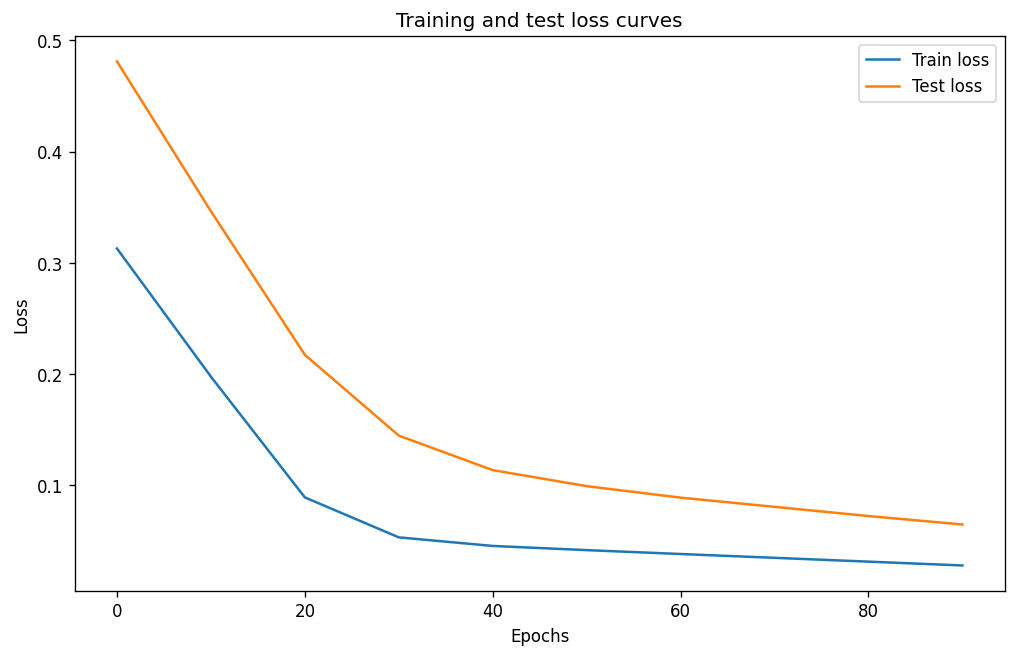

In [ ]:
# Plot the loss curves
plt.figure(figsize=(10, 6), dpi=120)
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

#### You can now see the trends visually on the graph. Revisit the questions above and recall that `loss` is a measure of how wrong the model is.
Now, why do you think the loss is going down with each epoch? What happens if we increased the epochs from 100 to 1000? What would happen if keep it at 100 but decrease the learning by 10 folds?

We are not going to inspect our [`.state_dict()`](https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html)

In [22]:
# Find our model's learned parameters
print("###"*20)
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")
print("###"*20)


############################################################
The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3
############################################################


You clearly see that the model's prameters have moved significantly closer from their random initialisation to the correct values of weights and bias!
> Can you make the distance between the learned parameters and the real ones (the ground truth) even smaller? Experiment with increasing the epochs to 200 and see what happens.


> **Exercise:** Try changing the `torch.manual_seed()` value two cells above, see what happens to the weights and bias values. Try restarting the runtime (or acessing the notebook from a different computer), when using the same seed (42), do you get the same results?!


## 4. Making predictions with a trained PyTorch model (inference)

Once you've trained a model, you'll likely want to make predictions with it.

We've already seen a glimpse of this in the training and testing code above, the steps to do it outside of the training/testing loop are similar.

There are three things to remember when making predictions (also called performing inference) with a PyTorch model:

1. You have to set the model to evaluation mode (`model.eval()`) before the forward pass.
2. Make the predictions using the inference mode context manager (`with torch.inference_mode(): ...`).
3. All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only). More on this below...


You will note that all of the above was done in the training/testing loop presented earlier. Moreover, the first two items make sure all helpful calculations and settings PyTorch uses behind the scenes during training but aren't necessary for inference are turned off (this results in faster computation). And the third ensures that you won't run into cross-device errors.

In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)

y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

Let's visualise these predictions!

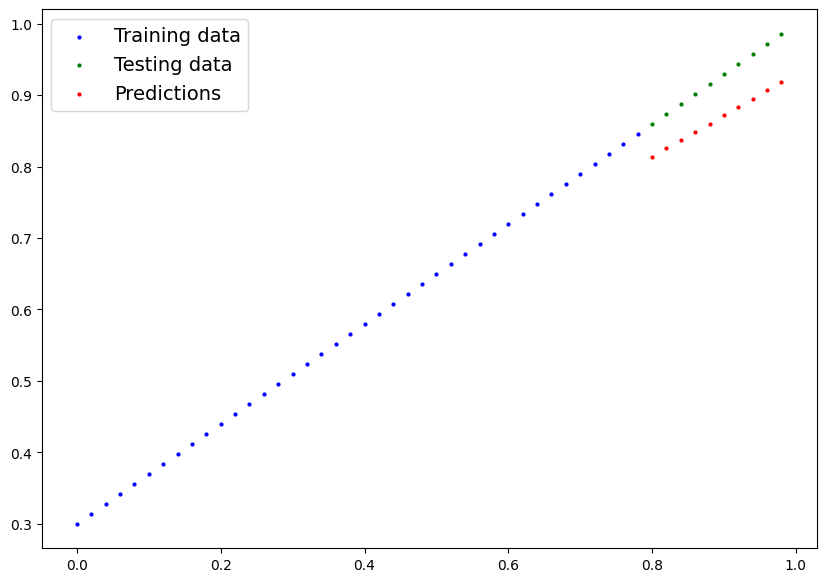

In [ ]:
plot_predictions(predictions=y_preds)

### And victory!

## 5. Introduction to Classification in PyTorch

Classification, along with regression (predicting a number, covered above) is one of the most common types of machine learning problems.

Here we will introduce a classification problems in PyTorch and solve it using the same methodology we followed earlier. However, here we will be using a basic two layers neural netowrk. This problem involves using a synthetic data from `scikit-learn`.



### 5.1 Import the synthetic data

We'll use the [`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) method from Scikit-Learn to generate two circles with different coloured dots.

In [ ]:
from sklearn.datasets import make_circles


# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

Now let's view the first 5 `X` and `y` values.

In [ ]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


Note that therea are two `X` values per one `y` value.

The [Pandas](https://pandas.pydata.org/docs/) is quite useful here. We are going to put `X` and `y`into a pandas DataFrame. Out Exploratory Data Analysis (EPA) will be smoother.

In [ ]:
# Make DataFrame of the synthetic circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


It looks like each pair of `X` features (`X1` and `X2`) has a label (`y`) value of either 0 or 1.

This tells us that our problem is **binary classification** since there's only two options (0 or 1).

How many values of each class is there?
What do you think the binary choices are?

In [ ]:
# Check different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

Our data is evenly split and balanced between the two labels!

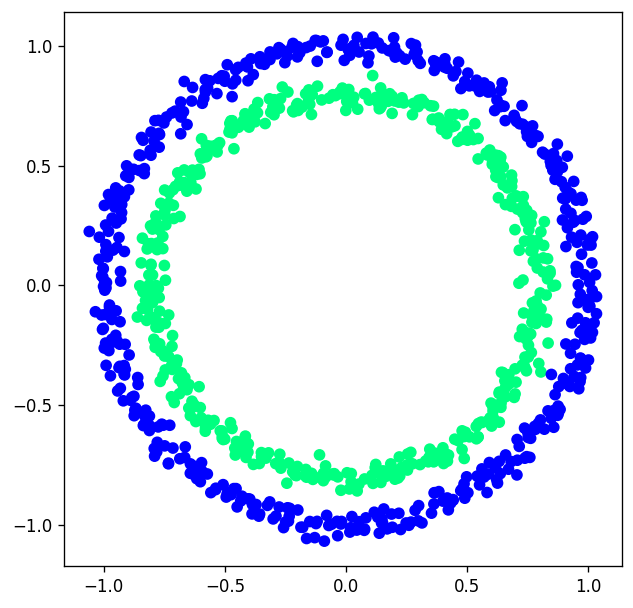

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6), dpi=120)
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.winter); # colour choice can be changed: https://matplotlib.org/stable/tutorials/colors/colormaps.html


Let's find out how we could build a PyTorch neural network to classify dots into blue (0) or green (1).

> **Note:** This dataset is often what's considered a **toy problem** (a problem that's used to try and test things out on) in machine learning.
>
> But it represents the major key of classification, you have some kind of data represented as numerical values and you'd like to build a model that's able to classify it, in our case, separate it into blue or green dots.

### 5.2 Input and output shapes

One of the most common errors in deep learning is shape errors. Mismatching the shapes of tensors and tensor operations will result in errors in your models.

And there's no surefire way to making sure they won't happen, they will. What you can do instead is continaully familiarise yourself with the shape of the data you're working with throughout the pipeline.

Ask yourself:

"What shapes are my inputs and what shapes are my outputs? What are the mathematical operations taking place between input and output that affect the dimensions of the data?"

From this, what do you expect the output shape of the model we're going to build will be?

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

Here, the data has 1000 points (each of two features) and corresponding 1000 labels.
Why do you think `X` has two features? Let's examine this!

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


Have you figured out why X has two features?

### 5.3 Turn data into tensors and split the data

In order for PyTorch to be able to process our data we first need to convert it into PyTroch Tensors. Currently, the data is in NumPy arrays.
Following that we will split `X` into `X_train` and `X_test` and split `y` similarly.



In [ ]:
# Current X and y type

X_sample.dtype, y_sample.dtype

(dtype('float64'), dtype('int64'))

Note that default data type in NumPy is float64. While in PyTorch (as we'll see below), the default data tyoe is float32. Bear this in mind as this may cause issues. For now, PyTorch will convert float64 to float32 using the `.type()` method.

In [ ]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5], X.dtype, y.dtype

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]),
 torch.float32,
 torch.float32)

##### Now that the data is in the correct format we will split it into a training dataset (80% of the data) and testing dataset (20% of the data). We will use `Scikit-Learn`'s [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) built in function. Note that `test_size=0.2` is what tells the model we're interested in 80/20 split.

In [ ]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### 5.4 Building the model
> 1. First, we will setup our code so that it's device agnostic (the can run on GPU or a CPU if a GPU is not available).
2. We will build the architecture of the model by inheriting from `nn.Module`. For more information about Object Oriented Programming please see: https://realpython.com/python3-object-oriented-programming/.
3. We define the loss function and the optimizer.
4. We build the training/testing loop in a manner similar to what we did earlier with linear regression.

In [ ]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code. In PyTorch, 'cuda' means gpu....don't ask.
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Excellent, now `device` is setup, we can use it for any data or models we create and PyTorch will handle it on the CPU (default) or GPU if it's available.

Note that our model must be capable of handling our `X` data as inputs and producing something in the shape of our `y` data as ouputs. In other words, given `X` (features) we want our model to predict `y` (label).

This is a **Supervided Learning** set up; our data contain both features and labels!

Let's create a model class that:
1. Subclasses `nn.Module` (almost all PyTorch models are subclasses of `nn.Module`).
2. Creates 2 `nn.Linear` layers in the constructor capable of handling the input and output shapes of `X` and `y`.
3. Defines a `forward()` method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target `device`.

In [ ]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

Note how different this architecture is from the one we used to solve the Linear Regression problem earlier.
`nn.Linear` takes in `in_features` and outputs `out_features`. The first layer, takes in the input data of two features (this is `X`) and turns this into an output of 5 featuers! Therefore, the second layer's input will also be of 5 features, however its output will only be 1! And that will be the final output of the model.

Increasing the features of the data between the first and second layers serves to make it easier for the model to detect patterns (as opposed to detecting patterns from two features).

The intuition behind this is that the outpput can only have one of two values (either 0 or 1) and for that we only need one feature! Note also that the model's output **MUST** match that of `y` in terms of shape and type.


![A visual example of what a classification neural network with linear activation looks like on the tensorflow playground](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-tensorflow-playground-linear-activation.png)
*A visual example of what a similar classificiation neural network to the one we've just built looks like. Try create one of your own on the [TensorFlow Playground website](https://playground.tensorflow.org/).*

The above architecure can also be written using [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) which performs a forward pass computation of the input data through the layers in the order they appear (example below). We will discuss this in future labs.



#### Question: Could you calculate how many hidden units or neurons exist in the model we just created?

In [ ]:
# Rewritting CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)




#### Now, let's generate some predictions from the model!

Can you guess how good/bad the model will perform at this stage? Recall that we have not trained it yet and the its internal parameters are all randomly initialised.

In [ ]:
# Make predictions with the model
model_0.eval()
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


#### Note that the output shape of the untrained model is not exactly the same as the y_test! These two vectors cannot be compared (for calculating the loss)
We will fix that in when we build the training/testing loop. But first, let's set up the loss function anf the optimizer.

The process is identical to what you encountered earlier in this notebook. However, while the earlier examples were of a linear regression problem (predicting a number), here this is a classification problem we're interested in prediction a label (a discrete value indicative of whether an observation belongs to a class or not). A consequence of this is that we can't use MAE to calculate the loss. However, we will be using [Bianry Cross Entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a). For a deeper dive check this excellent [post](https://colah.github.io/posts/2015-09-Visual-Information/).

We will use the same optimizer we used above, the stochastic gradient descent optimizer (SGD, `torch.optim.SGD()`).
Below is a table that lists the most common loss functions and optimizers and their functions in PyTorch:



| Loss function/Optimizer | Problem type | PyTorch Code |
| ----- | ----- | ----- |
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimizer | Classification, regression, many others. | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| Binary cross entropy loss | Binary classification | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) or [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Cross entropy loss | Multi-class classification | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Mean absolute error (MAE) or L1 Loss | Regression | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) |
| Mean squared error (MSE) or L2 Loss | Regression | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss). |  



PyTorch has two binary cross entropy implementations:

> 1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) - This is the same as above except it has a sigmoid layer ([`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)) built-in (we'll see what this means soon).

Which one should you use?

The [documentation for `torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) states that it's more numerically stable than using `torch.nn.BCELoss()` after a `nn.Sigmoid` layer. Briefly, we tend to use a final `nn.Sigmoid` for a binary classification problem (two choice, e.g. dogs vs cats) and `nn.SoftMax` for multi classification problems (e.g. predict what number is in the image). For more information on the `nn.Sigmoid` feel free to explore [this](https://machinelearningmastery.com/a-gentle-introduction-to-sigmoid-function/)

So generally, implementation of 2 is a better option. However for advanced usage, you may want to separate the combination of `nn.Sigmoid` and `torch.nn.BCELoss()` but that is beyond the scope of this notebook.

Knowing this, let's create a loss function and an optimizer.

> **Note:** There's a [discussion on the PyTorch forums about the use of `nn.BCELoss` vs. `nn.BCEWithLogitsLoss`](https://discuss.pytorch.org/t/bceloss-vs-bcewithlogitsloss/33586/4). It can be confusing at first but as with many things, it becomes easier with practice.

In [ ]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

Now let's also create an **evaluation metric**.

An evaluation metric can be used to offer another perspective on how your model is going. If a loss function measures how *wrong* your model is, think of evaluation metrics as measuring how *right* it is.

After all, when evaluating your models it's good to look at things from multiple points of view. There are several evaluation metrics that can be used for classification problems but let's start out with **accuracy**.

Accuracy can be measured by dividing the total number of correct predictions over the total number of predictions. For example, a model that makes 99 correct predictions out of 100 will have an accuracy of 99%.

Let's write a function to do so.



In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

We will use this function when training the model to measure performance alongside the loss.

### 5.5 Training the model


Recall that the model training steps in PyTorch are:

<details>
    <summary>PyTorch training loop steps</summary>
    <ol>
        <li><b>Forward pass</b> - The model goes through all of the training data once, performing its
            <code>forward()</code> function
            calculations (<code>model(x_train)</code>).
        </li>
        <li><b>Calculate the loss</b> - The model's outputs (predictions) are compared to the ground truth and evaluated
            to see how
            wrong they are (<code>loss = loss_fn(y_pred, y_train</code>).</li>
        <li><b>Zero gradients</b> - The optimizers gradients are set to zero (they are accumulated by default) so they
            can be
            recalculated for the specific training step (<code>optimizer.zero_grad()</code>).</li>
        <li><b>Perform backpropagation on the loss</b> - Computes the gradient of the loss with respect for every model
            parameter to
            be updated (each parameter
            with <code>requires_grad=True</code>). This is known as <b>backpropagation</b>, hence "backwards"
            (<code>loss.backward()</code>).</li>
        <li><b>Step the optimizer (gradient descent)</b> - Update the parameters with <code>requires_grad=True</code>
            with respect to the loss
            gradients in order to improve them (<code>optimizer.step()</code>).</li>
    </ol>
</details>



#### 5.5.1 Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

Before the training loop steps, let's see what comes out of our model during the forward pass (the forward pass is defined by the `forward()` method).

To do so, let's pass the model some data.

In [ ]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0', grad_fn=<SliceBackward0>)

Since our model hasn't been trained, these outputs are essentially random. But *what* are they? They're the output of our `forward()` method defined when we created the class CircleModelV0. Which in turn implements two layers of `nn.Linear()` that internally solve the following equation:

$$
\mathbf{y} = x \cdot \mathbf{Weights}^T  + \mathbf{bias}
$$

The *raw outputs* (unmodified) of this equation ($\mathbf{y}$) and in turn, the raw outputs of our model are often referred to as [**logits**](https://datascience.stackexchange.com/a/31045).

This is an important disctinction to make here since classification models will add a final layer to interpret these numbers. The layer used in binary classification models is a `Sigmoid` activation function. It transforms the difficult to interpret logits to probabilities! This makes comparison with ground truth labels much easier.  

**Note**: In multi-class classification models we will be using a [`softmax`](https://towardsdatascience.com/softmax-activation-function-how-it-actually-works-d292d335bd78)

Thus, since our model is a binary classification model with only one output (the `y` in the equation above when given `X_test` or `x` in the equation), `y` is the vector representing the logits!


**Note**: To get our model's raw outputs (logits) into such a form in PyTorch, we can use PyTorch's [sigmoid activation function](https://pytorch.org/docs/stable/generated/torch.sigmoid.html).



In [ ]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0', grad_fn=<SigmoidBackward0>)

Okay, it seems like the outputs now have some kind of consistency (Remember, that we are dealing with the untrained randomly initialised model). And it bears repeating that this means the values of the parameters (weights and biases) are initialised randomly.


The outputs are now in the form of **prediction probabilities** (referred to in this notebook as `y_pred_probs`), in other words, the values are now how much the model thinks the data point belongs to one class or another.

In our case, since we're dealing with binary classification, our ideal outputs are 0 or 1. So these values can be viewed as a decision boundary.

The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

More specificially:
* If `y_pred_probs` >= 0.5, `y=1` (class 1)
* If `y_pred_probs` < 0.5, `y=0` (class 0)

To turn our prediction probabilities in prediction labels, we simply round the prediction probabilities of the sigmoid activation function.

In [ ]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
# Get rid of extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True], device='cuda:0')
y_preds shape before squeezing: torch.Size([5, 1])
y_preds shape after squeezing: torch.Size([5, 1])


Excellent! Now it looks like our model's predictions are in the same form as our truth labels (`y_test`).

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

This means we'll be able to compare our models predictions to the test labels to see how well the model is learning.

To recap, we converted our model's raw outputs (logits) to predicition probabilities using a sigmoid activation function.

And then converted the prediction probabilities to prediction labels by rounding them. Essentially saying: anyhing over 0.5 round up to 1, otherwise round down to 0.

>
> **Note**: The use of the sigmoid activation function is not required when passing our model's raw outputs to the `nn.BCEWithLogitsLoss` (the "logits" in logits loss is because it works on the model's raw logits output), this is because it has a sigmoid function built-in. This becomes clear when we write our training loop.

#### 5.5.2 Building a training and testing loop

We have now discussed how to take our raw model outputs (the logits) and convert them to prediction labels, now let's build a training loop.

Let's start by training for 100 epochs and outputing the model's progress every 10 epochs.

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls. We're using sigmoid here to generate predictions to use when
                                                  # measuring the accuracy (below) NOT because we need them to measure the loss, the loss function has a sigmpiod layer built into it already

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69796, Accuracy: 51.88% | Test loss: 0.69440, Test acc: 58.00%
Epoch: 10 | Loss: 0.69590, Accuracy: 51.25% | Test loss: 0.69305, Test acc: 53.00%
Epoch: 20 | Loss: 0.69490, Accuracy: 51.62% | Test loss: 0.69254, Test acc: 49.50%
Epoch: 30 | Loss: 0.69435, Accuracy: 51.12% | Test loss: 0.69236, Test acc: 49.50%
Epoch: 40 | Loss: 0.69401, Accuracy: 50.88% | Test loss: 0.69232, Test acc: 51.00%
Epoch: 50 | Loss: 0.69378, Accuracy: 50.25% | Test loss: 0.69234, Test acc: 50.00%
Epoch: 60 | Loss: 0.69362, Accuracy: 50.00% | Test loss: 0.69239, Test acc: 51.50%
Epoch: 70 | Loss: 0.69351, Accuracy: 50.25% | Test loss: 0.69246, Test acc: 51.00%
Epoch: 80 | Loss: 0.69342, Accuracy: 49.88% | Test loss: 0.69254, Test acc: 50.00%
Epoch: 90 | Loss: 0.69336, Accuracy: 49.88% | Test loss: 0.69262, Test acc: 53.00%


Hmm, what do you notice about the performance of our model? Pay attention to the accuracy of both the training and testing. What does that tell you?
The accuracy barely moves above 50% after each epoch!

And because we're working with a balanced binary classification problem, it means our model is performing as good as random guessing (with 500 samples of class 0 and class 1, a model predicting class 1 every single time would, like a broken clock, achieve 50% accuracy). It's basically flipping coins!

## 6. Make predictions and evaluate the model

From the metrics it looks like our model is random guessing. How could we investigate this further?

Let's make some visualisation to aide us in trying to understand why is our model performing so poorly!

Let's make a plot of our model's predictions, the data it's trying to predict on and the decision boundary it's creating for whether something is class 0 or class 1.


In [ ]:
import numpy as np

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.
    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.winter)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

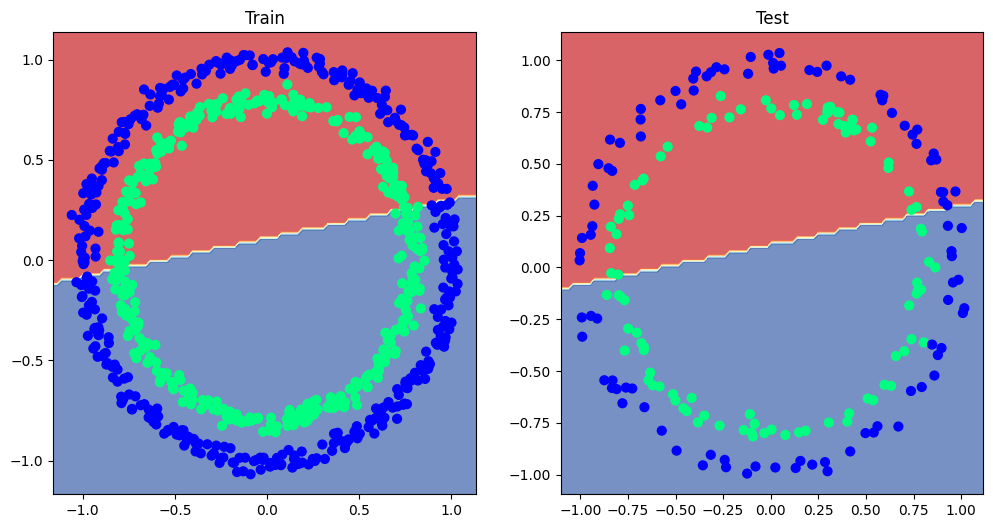

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

Oh wow, it seems like we've found the cause of model's performance issue.

It's currently trying to split the blue and green dots using a straight line.....which the model structurally cannot do - it uses straight lines only to find solutions!

That explains the 50% accuracy. Since our data is circular, drawing a straight line can at best cut it down the middle.

In machine learning terms, our model is [**underfitting**](https://www.v7labs.com/blog/overfitting-vs-underfitting), meaning it's not learning predictive patterns from the data.

How could we improve this?

## 7. Improving a model (from a model perspective)

Let's try to fix our model's underfitting problem.

Focusing specifically on the model (not the data), there are a few ways we could do this.

| Model improvement technique* | What does it do? |
| ----- | ----- |
| **Add more layers** | Each layer *potentially* increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data, more layers is often referred to as making your neural network *deeper*. |
| **Add more hidden units** | Similar to the above, more hidden units per layer means a *potential* increase in learning capabilities of the model, more hidden units is often referred to as making your neural network *wider*. |
| **Fitting for longer (more epochs)** | Your model might learn more if it had more opportunities to look at the data. |
| **Changing the activation functions** | Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint!). |
| **Change the learning rate** | Less model specific, but still related, the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough. |
| **Change the loss function** | Again, less model specific but still important, different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem. |
| **Use transfer learning** | Take a pretrained model from a problem domain similar to yours and adjust it to your own problem. This is an appraoch called [transfer learning](https://www.v7labs.com/blog/transfer-learning-guide). |

> **Note:** *because you can adjust all of these by hand, they're referred to as **hyperparameters**.
>
> And this is also where machine learning's half art half science comes in, there's no real way to know precisely what the best combination of values is for your project, best to conduct plenty of experiments and arriave at a handtuned solution this way!

Let's see what happens if we add an extra layer to our model, fit for longer (`epochs=1000` instead of `epochs=100`) and increase the number of hidden units from `5` to `10`.

We'll follow the same steps we did above but with a few changed hyperparameters.

In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible whilst sacrificing clarity.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

Now we've got a model, we'll recreate a loss function and optimizer instance, using the same settings as before.

In [ ]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

Now, let's make a training loop.

This time we'll train for longer (`epochs=1000` vs the earlier `epochs=100`) and see if it improves our model.

In [ ]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


Our model trained for longer and with an extra layer, however, it still looks like it didn't learn any patterns better than random guessing.

Let's visualize.

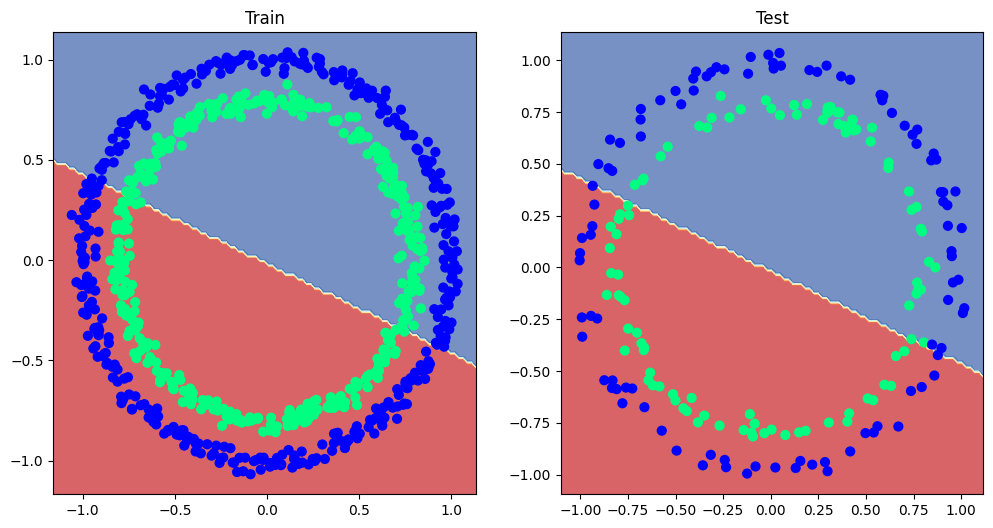

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)



Our model is still drawing a straight line between the blue and green dots.

If our model is drawing a straight line, could it model linear data? Like we did in in the earlier section of this notebook to solve the linear regression problem?

### 7.1 Preparing data to see if our model can model a straight line
Let's create some linear data to see if our model's able to model it and we're not just using a model that can't learn anything.

In [ ]:
# Create some data (identical to the linear regression model)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

Now let's split our data into training and test sets.

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


Beautiful, let's see how the data looks.

To do so, we'll use the `plot_predictions()` function we created earlier.


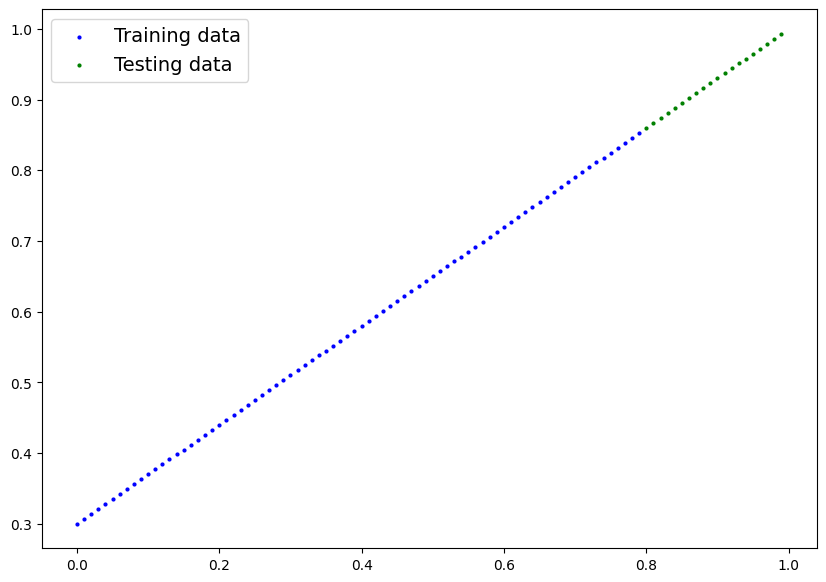

In [ ]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

### 5.2 Adjusting `model_1` to fit a straight line

Now we've got some data, let's recreate `model_1` but with a loss function suited to our regression data.

In [ ]:
# Identical architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

We'll setup the loss function to be `nn.L1Loss()` (the same as mean absolute error) and the optimizer to be `torch.optim.SGD()`.

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

Now let's train the model using the regular training loop steps for `epochs=1000` (just like `model_1`).

> **Note:** We've been writing similar training loop code over and over again. This is done on purpose. Practice and reptition in the beginning of learning any new skill are vital to making progress.
Having said that, can you think of ways the code of this notebook can be rewritten to promote re-usability?


In [ ]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05599, Test loss: 0.01426
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603


Okay, unlike `model_1` on the classification data, it looks like `model_2`'s loss on the regression data is actually going down.

Let's plot its predictions to see if that's so.

And remember, since our model and data are using the target `device`, and this device may be a GPU, however, our plotting function uses matplotlib and matplotlib can't handle data on the GPU.

To handle that, we'll send all of our data to the CPU using [`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) when we pass it to `plot_predictions()`.

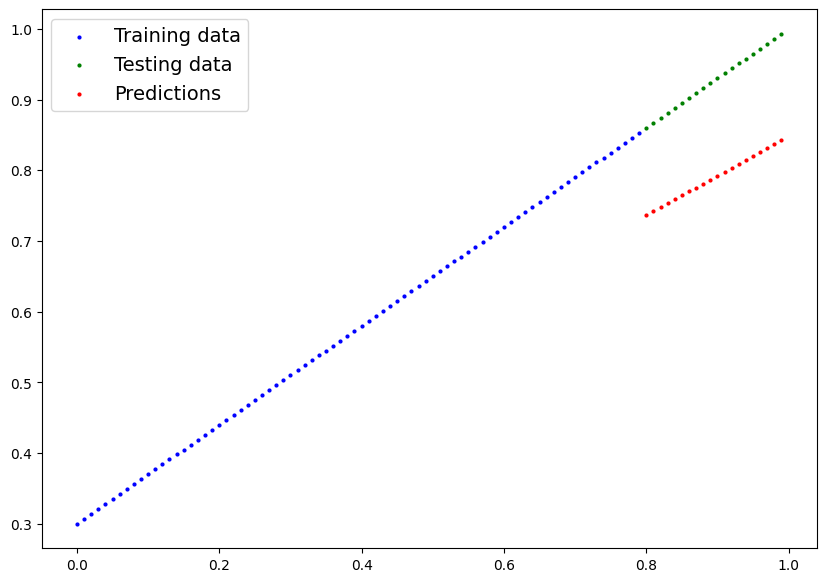

In [ ]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

Alright, it looks like our model is able to do far better than random guessing on straight lines, the predicted points are uniform and not too far from the ground truth (green). This is a good thing.

**It means our model at least has *some* capacity to learn.**

> **Note:** A helpful troubleshooting step when building deep learning models is to start as small as possible to see if the model works before scaling it up.
>
> This could mean starting with a simple neural network (not many layers, not many hidden neurons) and a small dataset (like the one we've made) and then **overfitting** (making the model perform too well) on that small example before increasing the amount data or the model size/design to *reduce* overfitting.

So what could it be?

Let's find out.

## 8. The missing piece: non-linearity

We have now seen our model can draw straight (linear) lines (essentially, the only skill it knows!), thanks to its linear layers. But how about we give it the capacity to draw non-straight (non-linear) lines?



### 8.1 Recreating non-linear data (red and blue circles)

First, let's recreate the data to start off fresh. We'll use the same setup as before.

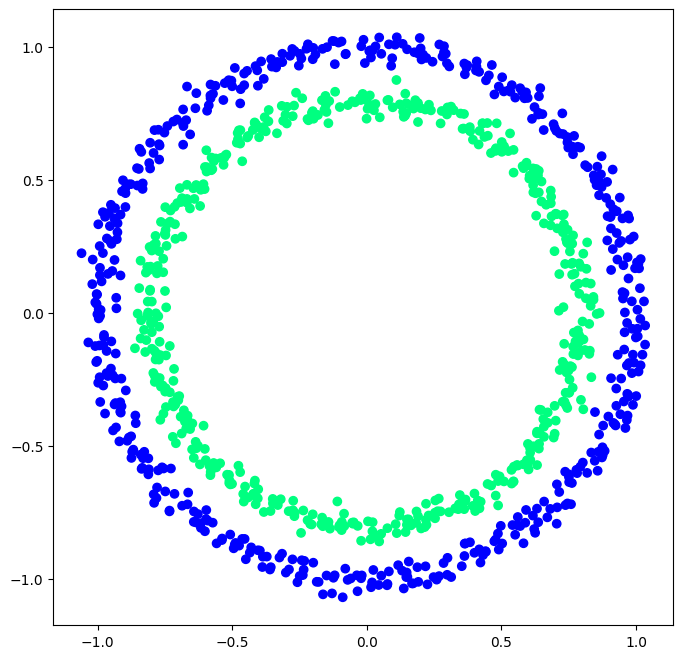

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.winter);

Let's split the data!

In [ ]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 8.2 Building a model with non-linearity

What kind of pattern do you think you could draw with unlimited straight (linear) and non-straight (non-linear) lines?

So far our neural networks have only been using linear (straight) line functions. But the data we've been working with is non-linear (circles).

What do you think will happen when we introduce the capability for our model to use **non-linear actviation functions**?

Well let's see.

PyTorch has a bunch of [ready-made non-linear activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) that do similiar but different things.

One of the most common and best performing is [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) (rectified linear-unit, [`torch.nn.ReLU()`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)).

Rather than talk about it, let's put it in our neural network between the hidden layers in the forward pass and see what happens.

In [ ]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function, this gives the model to create non-linear (non-straight) decision boundaries
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


![a classification neural network on TensorFlow playground with ReLU activation](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-tensorflow-playground-relu-activation.png)
*A visual example of what a similar classificiation neural network to the one we've just built (suing ReLU activation) looks like. Try create one of your own on the [TensorFlow Playground website](https://playground.tensorflow.org/).*

> **Question:** *Where should I put the non-linear activation functions when constructing a neural network?*
>
> A rule of thumb is to put them in between hidden layers and just after the output layer (remember the sigmoid layer at the output we used earlier?), however, there is no set in stone option. As you learn more about neural networks and deep learning you'll find a bunch of different ways of putting things together. In the meantine, best to experiment!

Now we've got a model ready to go, let's create a binary classification loss function as well as an optimizer.

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

### 8.3 Training a model with non-linearity

Let's create a training and testing loop! (have you figured out to make the code cleaner and more usable? HINT: functionalise it!)

In [ ]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


What do you notice is happening to the performance of the model (accuracy and loss)?

Why do you think that is? It's clear that the model can now perform much better than chance! We're getting 79& test accuracy!

### 8.4 Evaluating a model trained with non-linear activation functions

Remember how our circle data is non-linear? Well, let's see how our models predictions look now the model's been trained with non-linear activation functions.

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

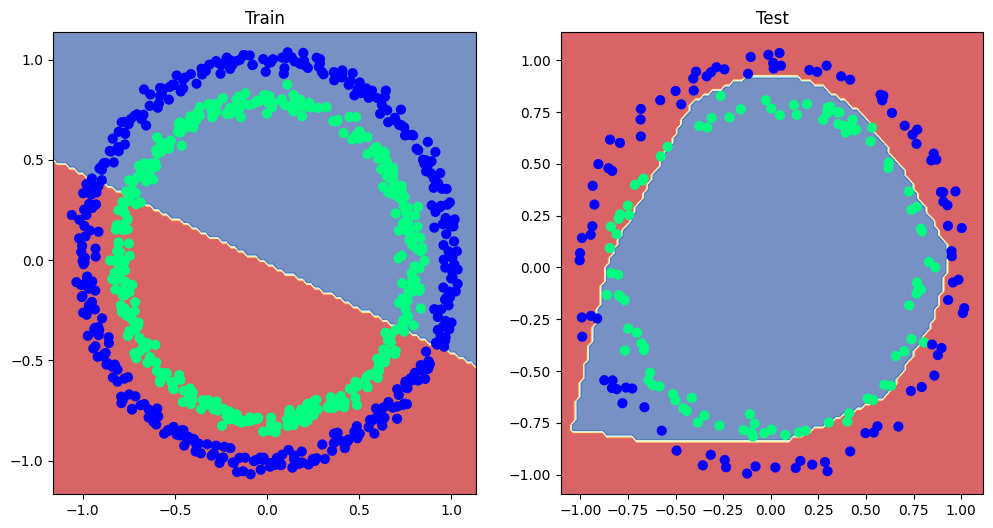

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

Not perfect but still far better than before!

Potentially you could try a few tricks to improve the test accuracy of the model? (hint: A variety of options were suggested earlier in this notebook, go back and experiment!)

## 9. Replicating non-linear activation functions

We saw before how adding non-linear activation functions to our model can helped it to model non-linear data.

> **Note:** Much of the data you'll encounter in real-world scenarios is non-linear (or a combination of linear and non-linear). Right now we've been working with dots on a 2D plot. But imagine if you had images of plants you would like to classify, there are a lot of different plant shapes. Or text from Wikipedia you'd like to summarize, there are lots of different ways words can be put together (linear and non-linear patterns).

But what does a non-linear activation *look* like?

How about we replicate some and what they do?

Let's start by creating a small amount of data.

In [ ]:
# Create a toy tensor (similar to the toy circle data going into our model(s))
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

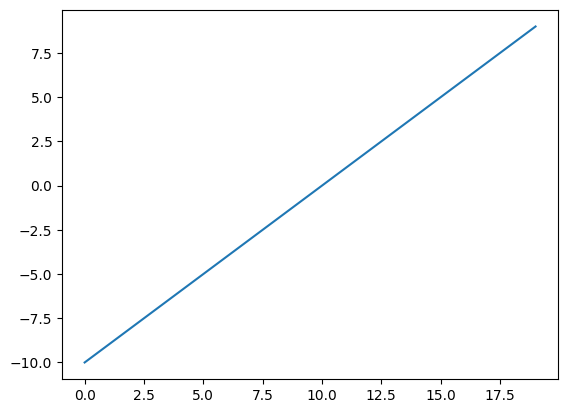

In [ ]:
# Visualize the toy tensor
plt.plot(A);

A straight line, nothing out of the ordinary there!

Now let's see how the ReLU activation function influences it.

And instead of using PyTorch's ReLU (`torch.nn.ReLU`), we'll recreate it ourselves.

By definitoon a ReLU function turns all negatives to 0 and leaves the positive values in the input as they are.

In [ ]:
# Create ReLU function by hand
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors. This will return the max of either x or 0. Thus, if x is negative it will return 0

# Pass toy tensor through ReLU function
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

It looks like our ReLU function worked, all of the negative values are zeros.

Let's plot them.

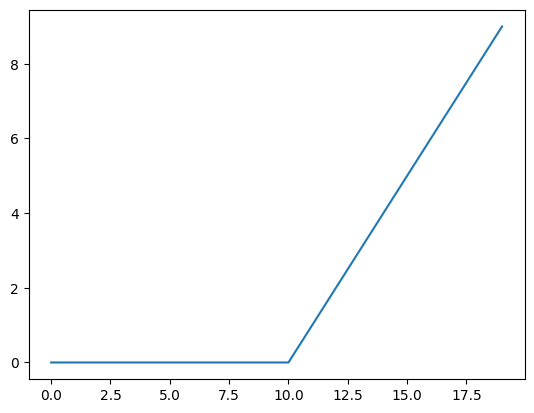

In [ ]:
# Plot ReLU activated toy tensor
plt.plot(relu(A));

Nice! That looks exactly like the shape of the ReLU function on the [Wikipedia page for ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).

How about we try the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) we've been using?

The sigmoid function formula goes like so:

$$ out_i = \frac{1}{1+e^{-input_i}} $$

Or using $x$ as input:

$$ S(x) = \frac{1}{1+e^{-x_i}} $$

Where $S$ stands for sigmoid, $e$ stands for [exponential](https://en.wikipedia.org/wiki/Exponential_function) ([`torch.exp()`](https://pytorch.org/docs/stable/generated/torch.exp.html)) and $i$ stands for a particular element in a tensor.

Let's build a function to replicate the sigmoid function with PyTorch.

In [ ]:
# Create a custom sigmoid function
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

# Test custom sigmoid on toy tensor
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

Woah, those values look a lot like prediction probabilities we've seen earlier, let's see what they look like visualized.

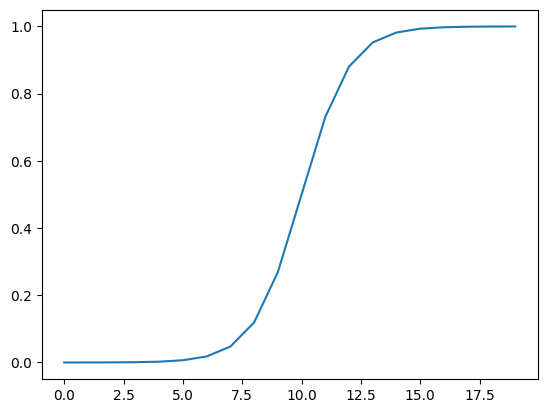

In [ ]:
# Plot sigmoid activated toy tensor
plt.plot(sigmoid(A));

Looking good! We've gone from a straight line to a curved line.

Now there's plenty more [non-linear activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) that exist in PyTorch that we haven't tried.

But these two are two of the most common.

And the point remains, what patterns could you draw using an unlimited amount of linear (straight) and non-linear (not straight) lines?



## 10. Putting things together by building a multi-class PyTorch model

We've covered a fair bit.

But now let's put it all together using a multi-class classification problem.

Recall a **binary classification** problem deals with classifying something as one of two options (e.g. a photo as a cat photo or a dog photo) where as a **multi-class classification** problem deals with classifying something from a list of *more than* two options (e.g. classifying a photo as a cat a dog or a chicken).



### 10.1 Creating multi-class classification data

To begin a multi-class classification problem, let's create synthetic multi-class data.

To do so, we can leverage Scikit-Learn's [`make_blobs()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) method.

This method will create however many classes (using the `centers` parameter) we want.

Specifically, let's do the following:

1. Create some multi-class data with `make_blobs()`.
2. Turn the data into tensors (the default of `make_blobs()` is to use NumPy arrays).
3. Split the data into training and test sets using `train_test_split()`.
4. Visualize the data.

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


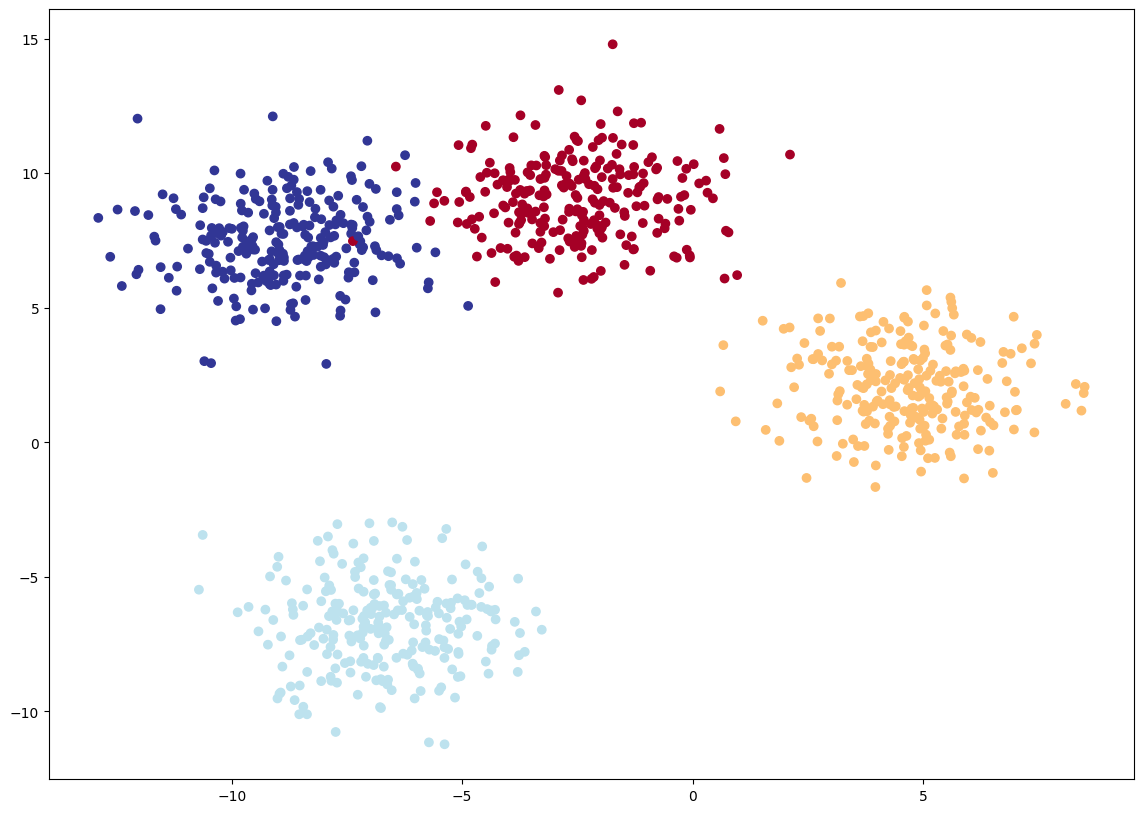

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(14, 10))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

Let's build a model to separate the coloured blobs.

> **Question:** Does this dataset need non-linearity? Or could you draw a succession of straight lines to separate it?

### 10.2 Building a multi-class classification model in PyTorch

We've created a few models in PyTorch so far.

You might also be starting to get an idea of how flexible neural networks are.

How about we build one similar to `model_3` but this still capable of handling multi-class data?

To do so, let's create a subclass of `nn.Module` that takes in three hyperparameters:
* `input_features` - the number of `X` features coming into the model.
* `output_features` - the ideal numbers of output features we'd like (this will be equivalent to `NUM_CLASSES` or the number of classes in your multi-class classification problem).
* `hidden_units` - the number of hidden neurons we'd like each hidden layer to use.

Since we're putting things together, let's setup some device agnostic code (we don't have to do this again in the same notebook, it's only a reminder).

Then we'll create the model class using the hyperparameters above.

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

Excellent! Our multi-class model is ready to go, let's create a loss function and optimizer for it.

### 10.3 Creating a loss function and optimizer for a multi-class PyTorch model

Since we're working on a multi-class classification problem, we'll use the `nn.CrossEntropyLoss()` method as our loss function.

And we'll stick with using SGD with a learning rate of 0.1 for optimizing our `model_4` parameters.


In [ ]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

### 10.4 Getting prediction probabilities for a multi-class PyTorch model

Alright, we've got a loss function and optimizer ready, and we're ready to train our model but before we do let's do a single forward pass with our model to see if it works.

In [ ]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4.eval()      # Note that setting the model to eval mode is not, strictly speaking here, necessary since the model is still at its inital state!
model_4(X_blob_train.to(device))[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], device='cuda:0',
       grad_fn=<SliceBackward0>)



It looks like we get one value per feature of each sample.

Let's check the shape to confirm.

In [ ]:
# How many elements in a single prediction sample?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

Wonderful, our model is predicting one value for each class that we have. IN other words, the model will have 4 outputs, one for each class!

Do you remember what the raw outputs of our model are called?

If you guessed *logits*, you'd be correct. So right now our model is producing raw logits, which are not very meaningful, but what if we wanted to figure out exactly which label it was the test sample(s)?

As in, how do we go from `logits -> prediction probabilities -> prediction labels` just like we did with the binary classification problem?

That's where the [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) comes into play.

The softmax function calculates the probability of each prediction class being the actual predicted class compared to all other possible classes.

If this doesn't make sense, let's see in code.

In [ ]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0',
       grad_fn=<SliceBackward0>)



It may still look like the outputs of the softmax function are random numbers (and they are, since our model hasn't been trained and is predicting using random patterns) but there's a very specific thing different about each sample.

After passing the logits through the softmax function, each individual sample now adds up to 1 (or very close to).

Let's check.

In [ ]:
# Sum the first sample output of the softmax activation function, that is: sum all four outputs!
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

These prediction probablities are essentially saying how much the model *thinks* the target `X` sample (the input) maps to each class.

Since there's one value for each class in `y_pred_probs`, the index of the *highest* value is the class the model thinks the specific data sample *most* belongs to.

We can check which index has the highest value using `torch.argmax()`.

In [ ]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1872, 0.2918, 0.1495, 0.3715], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(3, device='cuda:0')


You can see the output of `torch.argmax()` returns 3, so for the features (`X`) of the sample at index 0 (the first four random points), the model is predicting that the most likely class value (`y`) is 3. That is, for the four outputs (each output representing the probability of a class/blob), the third blob is the most likley correct one given the input to the model. It sounds quite nested, no!? But trust that it is important to understand what the `argmax()` is doing here, and what is employed in so many deep learning models.

Note that right now this is just random guessing, and the model's guess of label `3` has a 25% chance of being right (since there's four classes). But we can improve those chances by training the model.

> **Note:** To summarize the above, a model's raw output is referred to as **logits**.
>
> For a multi-class classification problem, to turn the logits into **prediction probabilities**, you use the softmax activation function (`torch.softmax`).
>
> The index of the value with the highest **prediction probability** is the class number the model thinks is *most* likely given the input features for that sample (although this is a prediction, it doesn't mean it will be correct).

### 10.5 Creating a training and testing loop for a multi-class PyTorch model

Alright, now we've got all of the preparation steps out of the way, let's write a training and testing loop to improve and evaluate our model.

We've done many of these steps before so much of this will be practice.

The only difference is that we'll be adjusting the steps to turn the model outputs (logits) to prediction probabilities (using the softmax activation function) and then to prediction labels (by taking the argmax of the output of the softmax activation function).

Let's train the model for `epochs=100` and evaluate it every 10 epochs.

In [ ]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%


### 10.6 Making and evaluating predictions with a PyTorch multi-class model

It looks like our trained model is performaning pretty well. After 100 epochs, it's getting 99.5% test accuracy!

But to make sure of this, let's make some predictions and visualize them.

In [ ]:
# Make predictions
model_4.eval()  # Use of eval mode/context manager here is a must, otherwise the model will be further trained and its weights will be changed.
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')

Though to evaluate the logits, they will have to be in the same form as our labels (`y_blob_test`) which are in integer form.

Let's convert our model's prediction logits to prediction probabilities (using `torch.softmax()`) then to prediction labels (by taking the `argmax()` of each sample).

> **Note:** It's possible to skip the `torch.softmax()` function and go straight from `predicted logits -> predicted labels` by calling `torch.argmax()` directly on the logits.
>
> For example, `y_preds = torch.argmax(y_logits, dim=1)`, this saves a computation step (no `torch.softmax()`) but results in no prediction probabilities being available to use.

In [ ]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


Our model predictions are now in the same form as our test labels.

Let's visualize them with `plot_decision_boundary()`, remember because our data is on the GPU, we'll have to move it to the CPU for use with matplotlib (`plot_decision_boundary()` does this automatically for us).

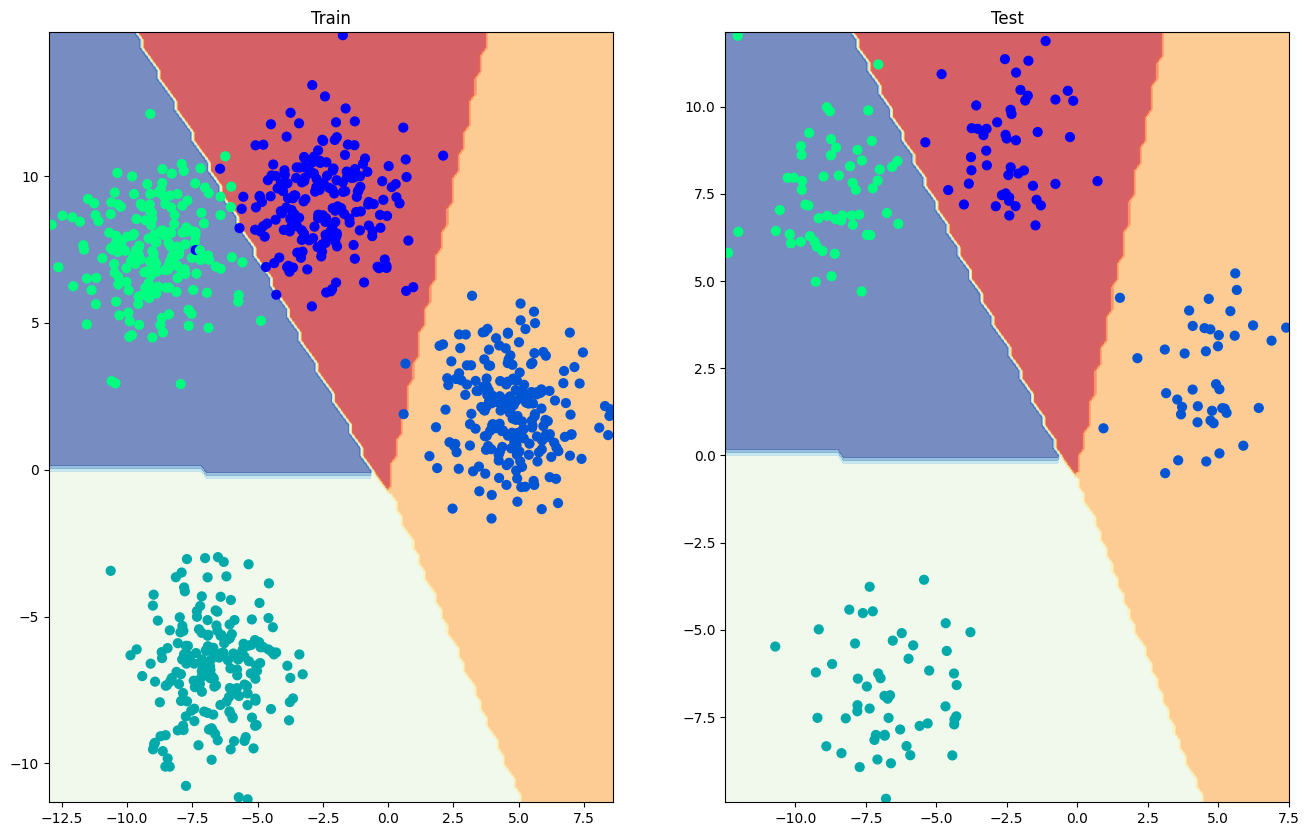

In [ ]:
plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 11. More classification evaluation metrics

So far we've only covered a couple of ways of evaluating a classification model (accuracy, loss and visualizing predictions).

These are some of the most common methods you'll come across and are a good starting point.

However, you may want to evaluate you classification model using more metrics such as the following:

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`torchmetrics.Accuracy()`](https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html#id3) or [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`torchmetrics.Precision()`](https://torchmetrics.readthedocs.io/en/stable/classification/precision.html#id4) or [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`torchmetrics.Recall()`](https://torchmetrics.readthedocs.io/en/stable/classification/recall.html#id5) or [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`torchmetrics.F1Score()`](https://torchmetrics.readthedocs.io/en/stable/classification/f1_score.html#f1score) or [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html#confusionmatrix) or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

Scikit-Learn (a popular and world-class machine learning library) has many implementations of the above metrics and you're looking for a PyTorch-like version, check out [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/), especially the [TorchMetrics classification section](https://torchmetrics.readthedocs.io/en/stable/pages/classification.html).

Let's try the `torchmetrics.Accuracy` metric out.




In [ ]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 kB 5.0 MB/s eta 0:00:00


tensor(0.9950, device='cuda:0')

## Exercises

All of the exercises are focused on practicing the code in the sections above.

You should be able to complete them by referencing each section or by following the resource(s) linked.

All exercises should be completed using [device-agonistic code](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code).


1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
    * For consistency, the dataset should have 1000 samples and a `random_state=42`.
    * Turn the data into PyTorch tensors. Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.
2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
    * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.
3. Setup a binary classification compatible loss function and optimizer to use when training the model.
4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
    * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
    * Train the model for long enough for it to reach over 96% accuracy.
    * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.
5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
    * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.
7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
    * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
    * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
    * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
    * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

```python
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()
```

## Extra-curriculum

* Research when accuracy might be a poor metric to use (hint: read ["Beyond Accuracy" by by Will Koehrsen](https://willkoehrsen.github.io/statistics/learning/beyond-accuracy-precision-and-recall/) for ideas). **HINT**: If you were to build a system capable of detecting cancerous growth in x-ray images, would accuracy be your first metric?

* **Watch:** For an idea of what's happening within our neural networks and what they're doing to learn, watch [MIT's Introduction to Deep Learning video](https://youtu.be/7sB052Pz0sQ).